In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
base_dir = 'cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [3]:
def extract_features(directory, sample_count):   
    datagen = ImageDataGenerator(rescale=1./255)
    batch_size = 20

    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break

    return features, labels


def plot_loss(loss_values, val_loss_values):
    epochs = range(1, len(loss_values) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


def plot_accuracy(acc, val_acc):
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

In [4]:
if __name__ == "__main__":

    conv_base = VGG16(weights='imagenet',
                    include_top=False,
                    input_shape=(150, 150, 3))

    conv_base.summary()

    train_features, train_labels = extract_features(train_dir, 2000)
    validation_features, validation_labels = extract_features(validation_dir, 1000)
    test_features, test_labels = extract_features(test_dir, 1000)

    train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
    validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
    test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
bloc

In [5]:
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                  loss='binary_crossentropy',
                  metrics=['acc'])

    history = model.fit(train_features, train_labels,
                        epochs=30,
                        batch_size=20,
                        validation_data=(validation_features, validation_labels))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 545us/step - loss: 0.6175 - acc: 0.6605 - val_loss: 0.4269 - val_acc: 0.8540
Epoch 2/30
2000/2000 [==============================] - 1s 306us/step - loss: 0.4208 - acc: 0.8055 - val_loss: 0.3644 - val_acc: 0.8550
Epoch 3/30
2000/2000 [==============================] - 1s 301us/step - loss: 0.3451 - acc: 0.8480 - val_loss: 0.3165 - val_acc: 0.8780
Epoch 4/30
2000/2000 [==============================] - 1s 302us/step - loss: 0.3048 - acc: 0.8735 - val_loss: 0.2969 - val_acc: 0.8830
Epoch 5/30
2000/2000 [==============================] - 1s 305us/step - loss: 0.2821 - acc: 0.8890 - val_loss: 0.2808 - val_acc: 0.8870
Epoch 6/30
2000/2000 [==============================] - 1s 307us/step - loss: 0.2583 - acc: 0.8960 - val_loss

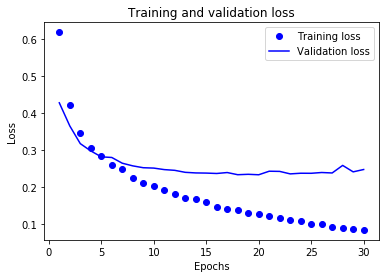

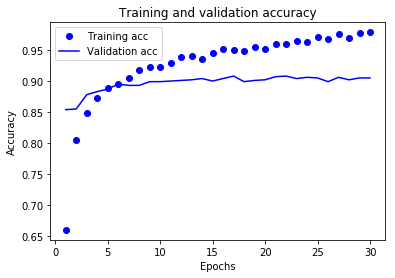

In [6]:
    history_dict = history.history
    plot_loss(history_dict['loss'], history_dict['val_loss'])
    plt.clf()
    plot_accuracy(history_dict['acc'], history_dict['val_acc'])
